In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import t
from packaging import version
intervalle = 0.95

# Méthode des ajouts dosés
## Question 10

In [2]:
upDeltaC = 1e-2 / 20
print('ΔC: {} g/L'.format(upDeltaC))

ΔC: 0.0005 g/L


## Question 11

Comme précédemment, il est possible d'utiliser les formules 6.8 à 6.11.

a_aj : 106.900 u_a 4.871
b_aj : 300.200 u_b 11.932


Text(0.5, 1.0, 'Résidus')

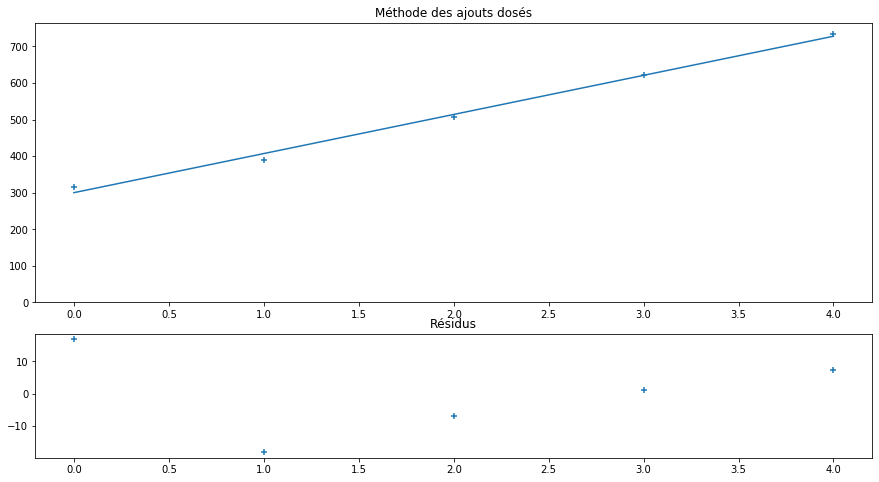

In [3]:
x_i = np.arange(5)
y_i = np.array([317,389,507,622,735])
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(3, 1,hspace=0.25)

#droite
ax1 = fig.add_subplot(gs[0:2,0])
#points expérimentaux
ax1.scatter(x_i,y_i,marker='+')
#modélisation par une droite affine
coeffs = np.polyfit(x_i,y_i,1)
coeffs2 = stats.linregress(x_i,y_i)
a_aj,b_aj,r,p,ua=coeffs2

#on affiche l'incertitude sur l'ordonnée à l'origine uniquement pour les versions pas trop vieilles de scipy
if version.parse(scipy.__version__) > version.parse('1.6') :
    #il manque l'incertitude sur l'ordonnée à l'origine pour les versions de scipy inférieures à 1.6
    ub=coeffs2.intercept_stderr
    print('a_aj : {:.3f} u_a {:.3f}\nb_aj : {:.3f} u_b {:.3f}'.format(a_aj,ua,b_aj,ub))
else:
    print('a_aj : {:.3f} u_a {:.3f}\nb_aj : {:.3f} '.format(a_aj,ua,b_aj))


#tracé de la droite correspondant à la modélisation
xs = np.linspace(np.min(x_i),np.max(x_i),2)
ys = np.polyval(coeffs,xs)
ax1.plot(xs,ys)
ax1.set_ylim(0,1.05*np.max(ys))
ax1.set_title('Méthode des ajouts dosés')
#résidus
ax2 = fig.add_subplot(gs[2,0])
ax2.scatter(x_i,y_i-np.polyval(coeffs,x_i),marker='+')
ax2.set_title('Résidus')

# Question 12

In [4]:
j0= b_aj/a_aj
print('j0 : {:.3f}'.format(j0))
CS2 = 20*j0*upDeltaC
print('CS2: {:.3e} g/L'.format(CS2))
CS0 = 100*CS2
print('CS0: {:.3f} g/L'.format(CS0))

j0 : 2.808
CS2: 2.808e-02 g/L
CS0: 2.808 g/L


# Question 13

In [5]:
#incertitude absolue sur le volume de S2/S3 (pipette de 5mL)
u_VS2=0.015/np.sqrt(3)
urelVS2 = u_VS2/5
print(u_VS2)

0.008660254037844387


In [6]:
#incertitude absolue sur le volume de la fiole de 100 mL
u_V100=0.1/np.sqrt(3)
urelV100 = u_V100/100
print(u_V100)

0.05773502691896258


On calcule ici l'incertitude sur les différents points $U_i$ en essayant d'estimer leur incertitude-type à l'aide des résidus.

In [7]:
#formule explicite pour 6.11
u_Ui=np.sqrt(1/(y_i.size-2)* np.square(y_i-a_aj*x_i-b_aj).sum() )
print(u_Ui)
#formule équivalente dans ce cas
u_Ui=np.std(y_i-a_aj*x_i-b_aj,ddof=2)
print(u_Ui)

15.404544783926582
15.404544783926582


In [8]:
#incertitude sur la valeur moyenne de U_i pour les différents points
u_moyUi = 1/np.sqrt(5)*u_Ui
moyUi = np.average(y_i)
urel_moyUi = u_moyUi/moyUi
print(u_moyUi)
print(moyUi)

6.889121859859929
514.0


In [9]:
u_CS2 = np.sqrt(2*(CS2*u_VS2/5)**2+2*(CS2*urelV100)**2+(20*upDeltaC/a_aj*u_moyUi)**2+(20/(a_aj**2)*upDeltaC *moyUi*ua)**2 ) 
print('u_CS2 : {}'.format(u_CS2))

urel_CS2=u_CS2/CS2
print('u_CS2/C_S2 : {}'.format(urel_CS2))

u_CS2 : 0.00228503004694942
u_CS2/C_S2 : 0.08136899134540074


In [10]:
urel_CS0 = np.sqrt(urel_CS2**2+(0.4/(1000*np.sqrt(3)))**2+(0.02/(10*np.sqrt(3)))**2)
print('u_CS0/C_S0: {}'.format(urel_CS0))
u_CS0 = urel_CS0*CS0
print('u_CS0: {}'.format(u_CS0))

u_CS0/C_S0: 0.08137751175376749
u_CS0: 0.22852693197830684


[0.09 0.01 7.95 91.93 0.00 0.02]


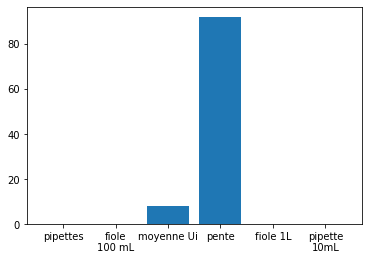

In [11]:
sources = {'pipettes':2*(CS0*u_VS2/5)**2,'fiole\n100 mL':2*(CS0*urelV100)**2, 'moyenne Ui':((100*20*upDeltaC/a_aj*u_moyUi)**2)\
           , 'pente':(100*20/(a_aj**2)*upDeltaC*moyUi*ua)**2,'fiole 1L': (0.4*CS0/(1000*np.sqrt(3)))**2,'pipette\n10mL':(0.02*CS0/(10*np.sqrt(3)))**2}
vals = np.asarray(list(sources.values()))/u_CS0**2*100
np.set_printoptions(precision=2,linewidth=100,floatmode='fixed',formatter={'float':lambda x:'{:.2f}'.format(x)})
xs = np.arange(len(vals))
print(vals)
plt.bar(xs,vals,align='center')
plt.xticks(xs, sources.keys())
plt.show()

Contribution des différentes sources d'incertitudes sur la grandeur $C_{S_0}$

# Question 14

In [12]:
taj = t.interval(0.95,3)[1]
print('cofficient de student : {:.3f}'.format(taj))

cofficient de student : 3.182


In [13]:
UCS0 = u_CS0*taj
print('C_S0 = {:.1f}±{:.1f} g/L ({:.0f}%)'.format(CS0,UCS0,intervalle*100))


C_S0 = 2.8±0.7 g/L (95%)


# Importance de la corrélation $a_{aj}/b_{aj}$

Ici, on commencer par le calcul «naïf» avec la formule (3.12) qui porte sur la propagation entre variables non corrélées.

In [14]:
#j0=b/a
#incertitudes relatives sur a_aj et b_aj
urel_aaj = ua/a_aj
urel_baj = ub/b_aj
#calcul naif de l'incertitude sans prendre en compte la corrélation
urel_j0_naif = np.sqrt(urel_aaj**2+urel_baj**2)
print('urel_j0 naïf : {:.3e}'.format(urel_j0_naif))

urel_j0 naïf : 6.047e-02


On peut ensuite calculer la covariance entre $a_{aj}$ et $b_{aj}$ avec les formules suivantes (la formule de calcul de la covariance (2.1) ne pouvant pas être utilisée dans ce cas) :
\begin{align}
\mathrm{cov}(a,b) ={}& -\overline{x_i} \times u_a^2\\
\mathrm{cov}(a,b) ={}& -\overline{x_i} \times \dfrac{u_{y_i}^2}{\sum (x_i - \overline{x_i})^2}
\end{align}

In [15]:
#Correction avec calcul explicite de la corrélation
#on utilise deux formulation équivalentes de la covariance entre a_aj et b_aj
moyx = np.average(x_i)

covab1 = -moyx*ua**2
covab2 = -moyx*u_Ui**2/(np.square(x_i-moyx).sum())

print('cov(a,b) : \nméthode 1 {:.3f} \nméthode 2 {:.3f}'.format(covab1,covab2))
#calcul du coefficient de corrélation pour voir qu'il est non nul
raajbaj=covab1/(ua*ub)
print('coefficient de corrélation entre a_aj et b_aj {:.3f}'.format(raajbaj))

cov(a,b) : 
méthode 1 -47.460 
méthode 2 -47.460
coefficient de corrélation entre a_aj et b_aj -0.816


On peut ensuite utiliser la formule de propagation (3.18) qui prend explicitement en compte la corrélation entre variables. Cela demande de calculer la dérivée partielle de $j^0$ par rapport à $b$ et $a$, ce qui donne un terme en $-\dfrac{(j^0)^2}{a_{aj}b_{aj}}$ :
\begin{align}
j^0 ={}& \dfrac{b}{a}\\
\dfrac{u_{j^0}}{j^0} =&{} \sqrt{\left(\dfrac{u_b}{b}\right)^2+\left(\dfrac{u_a}{a}\right)^2-2\dfrac{1}{a\times b} \times \mathrm{cov}(a,b)}
\end{align}

In [16]:
#On corrige, la derivée par rapport à a_aj est -j0/a ce qui explique le - devant la covariance
#le facteur 2 est pour prendre en compte la double dérivée partielle 
urel_j0_corrige = np.sqrt(urel_aaj**2+urel_baj**2-2*covab1/(a_aj*b_aj))
print('urel_j0 corrigé méthode covariance : {:.3e}'.format(urel_j0_corrige))

urel_j0 corrigé méthode covariance : 8.133e-02


Ou faire comme dans le TD en se ramenant à des variables non corrélées sur lesquelles il est possible d'utiliser la formule de propagation (3.12) entre variables non corrélées.

In [17]:
#Calcul plus pédestre mais équivalent où on découple explicitement b et a
uj0 = np.sqrt((u_moyUi/a_aj)**2+(moyUi/a_aj**2)**2*ua**2)
print('urel_j0 corrigé méthode découplage : {:.3e}'.format(uj0/j0))

urel_j0 corrigé méthode découplage : 8.133e-02


On trouve bien évidemment le même résultat dans les deux cas!

### Importance de la corrélation

On peut alors voir que la corrélation entre $a$ et $b$ joue pour environ 45% de l'incertitude finale ! 

[31.40 23.89 44.72]


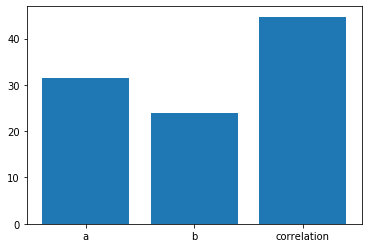

In [18]:
#affichage graphique
sources = {'a':urel_aaj**2, 'b':urel_baj**2\
           , 'correlation':-2*covab1/(a_aj*b_aj)}
vals = np.asarray(list(sources.values()))/urel_j0_corrige**2*100
xs = np.arange(len(vals))
print(vals)
plt.bar(xs,vals,align='center')
plt.xticks(xs, sources.keys())
plt.show()